Decision Trees for Classification

Import Data

In [21]:
import pandas as pd

data = pd.read_csv('1) iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

X = data.iloc[:, :-1] 
y = data["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train Model

In [3]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

Visualise the Tree Structure

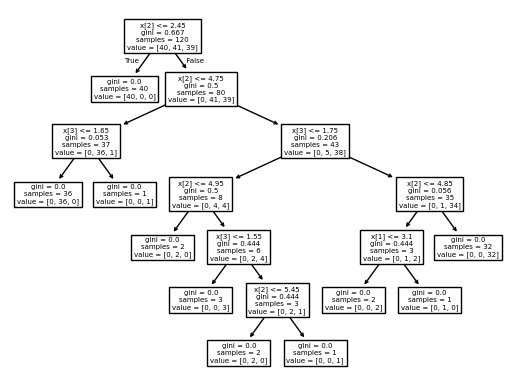

In [7]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plot_tree(dtree)
plt.show()

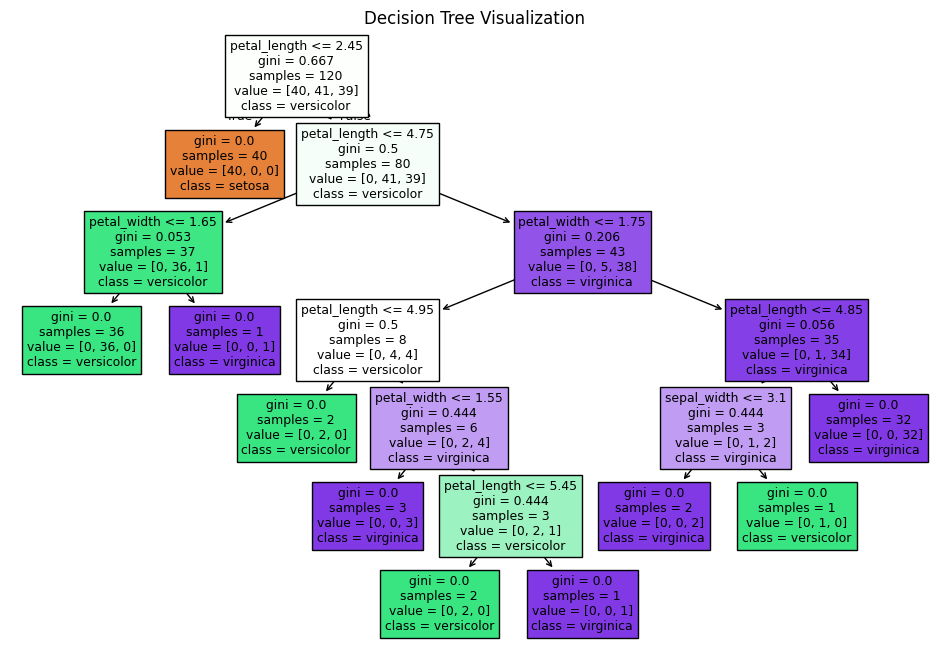

In [8]:
plt.figure(figsize=(12, 8))
plot_tree(dtree, filled=True, feature_names=X.columns, class_names=dtree.classes_)
plt.title("Decision Tree Visualization")
plt.show()

Make Prediction

In [9]:
y_pred = dtree.predict(X_test)

Calculate Accuracy Score

In [13]:
from sklearn.metrics import accuracy_score,f1_score,classification_report

In [14]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")

print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0000
F1-score: 1.0000


Prune The Tree To Prevent Overfitting

In [15]:
pruned_dtree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)
pruned_dtree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

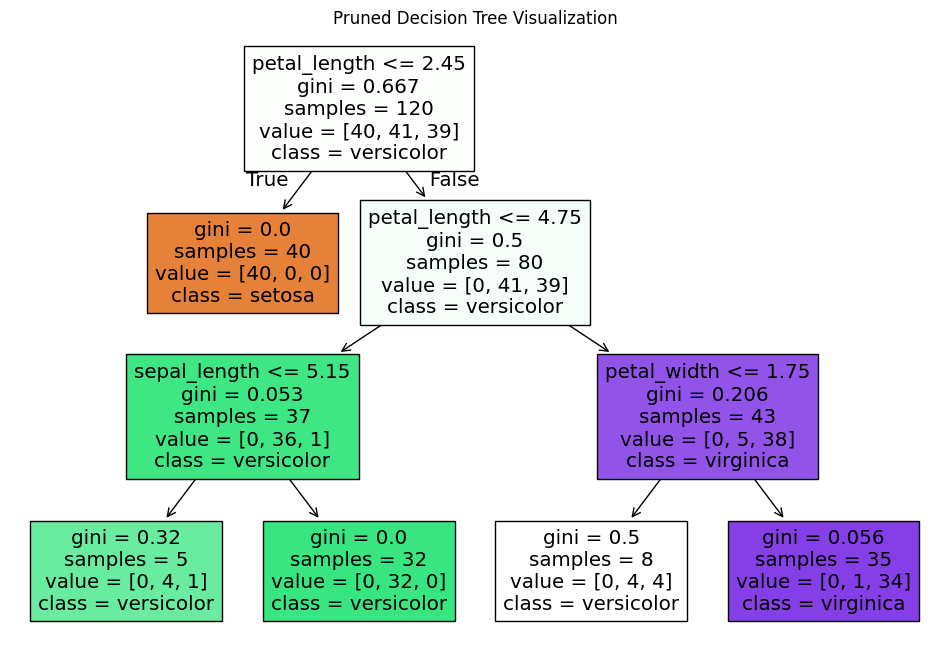

In [16]:
plt.figure(figsize=(12, 8))
plot_tree(pruned_dtree, filled=True, feature_names=X.columns, class_names=pruned_dtree.classes_)
plt.title("Pruned Decision Tree Visualization")
plt.show()

In [17]:
y_pred_pruned = pruned_dtree.predict(X_test)

In [18]:
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
f1_pruned = f1_score(y_test, y_pred_pruned, average="weighted")

print("\nAfter Pruning:")
print("Classification Report:\n", classification_report(y_test, y_pred_pruned))
print(f"Accuracy: {accuracy_pruned:.4f}")
print(f"F1-score: {f1_pruned:.4f}")


After Pruning:
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0000
F1-score: 1.0000
